# Image generator

Starting from two PNG images: background and indicator, a programmatic imageset is generated.
Input images shall be placed under data_generator folder. Programmatic images are placed directly in data_raw_all folder.

### Prerequisite
Installed OpenCV libary within python (opencv)

In [2]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt



In the below section, all code customization is grouped for the user convenience.
- `background_relative_path` contains the relative path of the background
- `indicator_relative_path` contains the relative path of the indicator arrow
- `programmatic_name_per_output` this string will be used in name generation as second part of the filename
- `center_of_rotation` is a tuple reporting (x, y) position of the center of rotation of the indicator
- `angle_offset_per_zero` reports the angle for zero of gauge. This is a relative value bewtween the indicator image angle and zero angle in background (this value is reported in degree)
- `clockwise_gauge` reports if gauge is clockwise. (False means that guage is counter-clockwise)

In [26]:
background_relative_path = "data_generator/background.jpg"
indicator_relative_path = "data_generator/indicator.png"
programmatic_name_per_output = "gas_tank"
angle_offset_per_zero = 269
center_of_rotation = (210,220)
startingPoint = (15, 92)
endPoint = (85, 268)
clockwise_gauge = False

In [4]:
background_img = cv2.imread(background_relative_path)
indicator_img = cv2.imread(indicator_relative_path, cv2.IMREAD_UNCHANGED)

In [27]:
def calculate_angle_from_percentage(p):
    m = (endPoint[1] - startingPoint[1]) / (endPoint[0] - startingPoint[0])
    q = startingPoint[1] - m * startingPoint[0]
    res = m * p + q 
    if clockwise_gauge == False:
        res *= -1
    return res + angle_offset_per_zero
        
def rotate_image(percentage):
    angle = calculate_angle_from_percentage(percentage)
    rotation_function = cv2.getRotationMatrix2D(center_of_rotation, angle, 1.0)
    indicator_rotated_image = cv2.warpAffine(indicator_img, rotation_function, indicator_img.shape[1::-1], flags=cv2.INTER_LINEAR)
    alpha = cv2.merge([indicator_rotated_image[:,:,3]]*3)
    return np.where(alpha==(0,0,0), background_img, indicator_rotated_image[:,:,0:3])

In [34]:
for percentage in range(0,100):
    img = rotate_image(percentage)
    cv2.imwrite(f'data_raw_all/{int(percentage/10)}.{percentage%10}_{programmatic_name_per_output}.jpg', img)

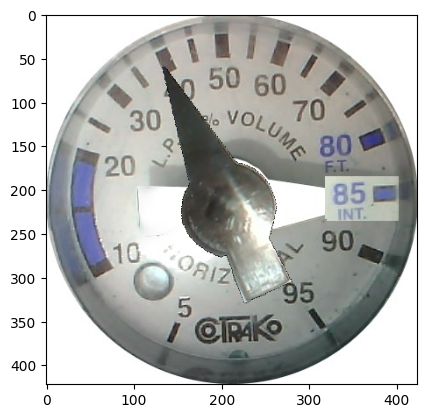

In [33]:
plt.imshow(rotate_image(41))
plt.show()

In [20]:
endPoint[0]

85